# Case study: Social Good
## Problem Statement: Identifying Human Skin Disease
## Solution: A skin disease image detector
Can be implemented to develop an app that help people to detect their skin disease, helping them to get to know more about the skin disease and seek for medical help.

For current version, it is capable of identifying following types of skin disease:
- Acne
- Chicken Skin
- Eczema
- Leprosy
- Psoriasis
- Ringworm
- Warts


# Installing Dependencies

In [1]:
!pip install roboflow
!pip install ultralytics

  Obtaining dependency information for roboflow from https://files.pythonhosted.org/packages/5d/d5/666eaa3f370ba99bf8d31daadc1c739f0874da6bb155d781fcf34e21e4a0/roboflow-1.1.11-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 3.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.2 MB/s eta 0:00:00
  Obtaining dependency information for opencv-python-headless==4.8.0.74 from https://files.pythonhosted.org/packages/76/02/f128517f3ade4bb5f71e2afd8461dba70e3f466ce745fa1fd1fade9ad1b7/opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.8 MB/s eta 0:00:00
  Obtaining dependency information for supervision from https://files.pythonhosted.org/packages/c0/59/6bc863f530c0ba5da4c565fd40f17b2b333c2ab28b783202937293ae494a/supervision-0.16.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 6

# Collect Skin Disease Dataset

In [2]:
#Import libraries

from IPython.display import display, Image


import ultralytics
ultralytics.checks()
from ultralytics import YOLO


from roboflow import Roboflow

Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5173.6/8062.4 GB disk)


A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


In [3]:
rf = Roboflow(api_key="fyJMQmLLLiuzSkBkzlEQ")
project = rf.workspace("skin-disease").project("skin-disease-detection-vecgj")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.221, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Skin-Disease-Detection-1 in yolov8:: 100%|██████████| 6990/6990 [00:00<00:00, 9448.20it/s] 


In [4]:
dataset.location

'/kaggle/working/Skin-Disease-Detection-1'

In [5]:
!ls {dataset.location}

README.dataset.txt  README.roboflow.txt  data.yaml  test  train  valid


# Prepare Dataset for training

In [6]:
file_path = f"{dataset.location}/data.yaml"
yaml_content = f"""
names:
- Acne
- Chicken Skin
- Eczema
- Healthy Skin
- Leprosy
- Psoriasis
- Ringworm
- Warts
nc: 8
roboflow:
  license: CC BY 4.0
  project: skin-disease-detection-vecgj
  url: https://universe.roboflow.com/skin-disease/skin-disease-detection-vecgj/dataset/1
  version: 1
  workspace: skin-disease
test: {dataset.location}/test/images
train: {dataset.location}/train/images
val: {dataset.location}/valid/images
"""

print(yaml_content)
try:
    with open(file_path, 'w') as file:
        file.write(yaml_content)
    print(f"YAML content has been overwritten in '{file_path}'")
except FileNotFoundError:
    print(f"File '{file_path}' not found.")


names:
- Acne
- Chicken Skin
- Eczema
- Healthy Skin
- Leprosy
- Psoriasis
- Ringworm
- Warts
nc: 8
roboflow:
  license: CC BY 4.0
  project: skin-disease-detection-vecgj
  url: https://universe.roboflow.com/skin-disease/skin-disease-detection-vecgj/dataset/1
  version: 1
  workspace: skin-disease
test: /kaggle/working/Skin-Disease-Detection-1/test/images
train: /kaggle/working/Skin-Disease-Detection-1/train/images
val: /kaggle/working/Skin-Disease-Detection-1/valid/images

YAML content has been overwritten in '/kaggle/working/Skin-Disease-Detection-1/data.yaml'


# Model Training
(When reached 171/200 epochs, it stopped training early as no improvement observed in last 50 epochs. Best results observed at epoch 121)

In [7]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=1 imgsz=512 plots=True

100%|██████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 20.9MB/s]
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/Skin-Disease-Detection-1/data.yaml, epochs=1, patience=50, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_

# Predict Using the Model Trained
Used best model trained before, training require high epochs and long time

In [27]:
!yolo task=detect mode=predict model=/kaggle/input/model-2/model.pt conf=.1 source="/kaggle/input/predict-image/image4.jpg" save=True show_boxes=True


Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /kaggle/input/predict-image/image4.jpg: 352x512 1 Warts, 56.4ms
Speed: 4.1ms preprocess, 56.4ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 512)
Results saved to runs/detect/predict9
💡 Learn more at https://docs.ultralytics.com/modes/predict


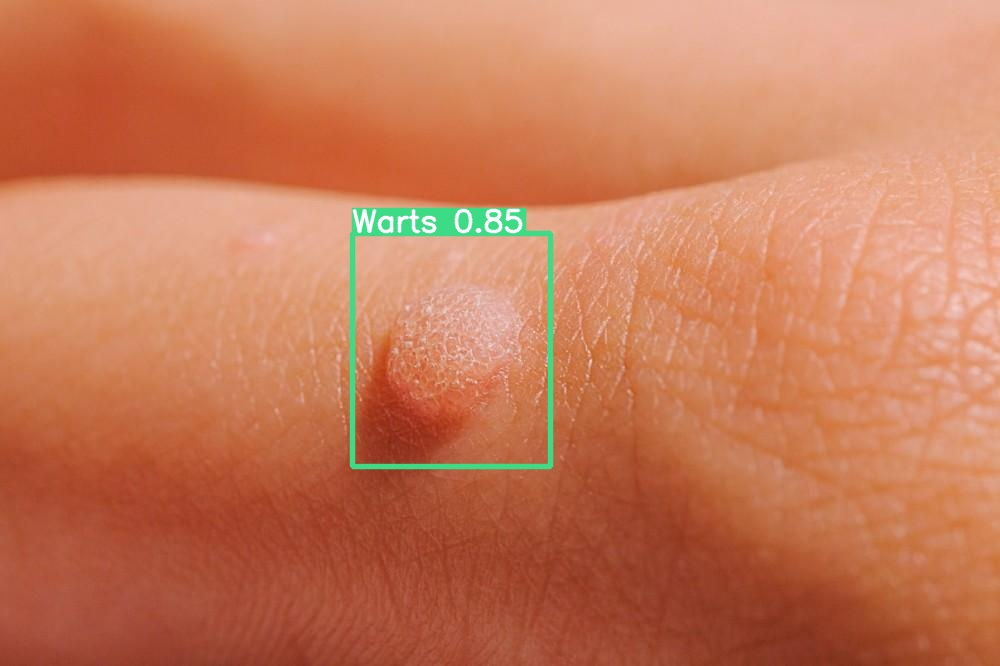

In [29]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/kaggle/working/runs/detect/predict9/*')[0:90]:
      display(Image(filename=image_path, width=600))
      print("\n")